# Environment

In [1]:
import gc 
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
from datetime import datetime
import importlib

import celloracle as co
importlib.reload(co)
from celloracle import *

sys.path.insert(0, "/home/michal.kubacki/Githubs/Re-MEND/code/External_Datasets/GeneSet_Derivation/Herring_celloracle/helpers")

import config
importlib.reload(config)
from config import *
n_cpus = 32

which: no R in (/home/michal.kubacki/Downloads/usr/share/code/bin:/home/michal.kubacki/.local/bin:/home/michal.kubacki/micromamba/condabin:/home/michal.kubacki/cuda/bin:/home/michal.kubacki/.local/bin:/cm/shared/apps/slurm/current/sbin:/cm/shared/apps/slurm/current/bin:/cm/local/apps/environment-modules/4.5.3//bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/sbin:/usr/sbin:/cm/local/apps/environment-modules/4.5.3/bin:/opt/dell/srvadmin/bin:.:/home/michal.kubacki/lib/hdf5-1.10.5/bin:/scratch/michal.kubacki/modules/bedtools2/bin:/home/michal.kubacki/Downloads/usr/share/code/bin)


In [2]:
reference = "hg19"

neurons_set = "all_excitatory_all_ages"
# neurons_set = "all_excitatory"

cells_dict = {
    "all_excitatory"            :   ['L5-6_TLE4', 'L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS', 'PN_dev'],
    "all_excitatory_all_ages"   :   ['L5-6_TLE4', 'L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS', 'PN_dev']
}

ages_dict = {
    "all_excitatory"            :   ['1m','3m','6m','10m','1y','2y','4y','ga22','ga24'],
    "all_excitatory_all_ages"   :   ['1m','3m','6m','10m','1y','2y','4y','6y','10y','16y','20y','40y','ga22','ga24']
}

output_dir, input_dir, root_dir, tmp_dir, in_dir_from_scenic = set_custom_folders(reference, neurons_set)

sel_celltypes  = cells_dict[neurons_set]
sel_ages = ages_dict[neurons_set]

root_dir: /group/testa/michal.kubacki/herring
out_dir: /group/testa/michal.kubacki/herring/output_hg19_all_excitatory_all_ages/celloracle
in_dir: /group/testa/michal.kubacki/herring/data
tmp_dir: /group/testa/michal.kubacki/herring/celloracle/tmp


In [3]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

# Load the data

In [3]:
oracle_file_name = os.path.join(output_dir, "oracle_1.celloracle.oracle")
links_file_name = os.path.join(output_dir, "links_1.celloracle.links")

In [4]:
oracle = co.load_hdf5(oracle_file_name)

In [5]:
links = co.load_hdf5(links_file_name)

In [6]:
links

In [7]:
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)

In [8]:
gc.collect()

350

# Fit GRNs

In [9]:
oracle.fit_GRN_for_simulation(alpha=10, use_cluster_specific_TFdict=True)

  0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
# current_datetime = datetime.now().strftime("%Y%m%d_%H%M%S")
# current_datetime = ""
# file_name = os.path.join(output_dir, f"Herring_simulation.celloracle.oracle")

In [11]:
# oracle.to_hdf5(file_name)

In [12]:
# current_datetime = ""
# file_name = f'{folder}Herring_simulation.celloracle.oracle'
# oracle = co.load_hdf5(file_name)

In [13]:
oracle.adata.obs.major_clust.unique()

['PN_dev', 'L2-3_CUX2', 'L5-6_THEMIS', 'L5-6_TLE4', 'L4_RORB']
Categories (5, object): ['L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS', 'L5-6_TLE4', 'PN_dev']

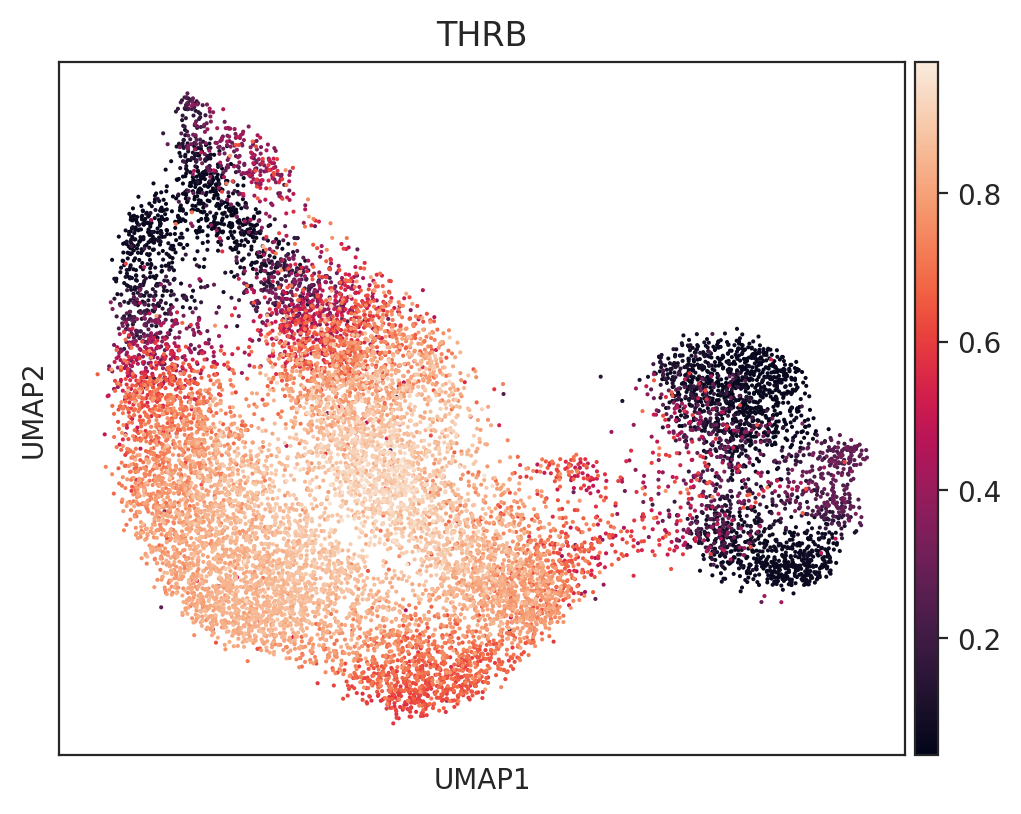

In [14]:
goi = "THRB"

sc.pl.umap(oracle.adata, color = [goi], layer="imputed_count")

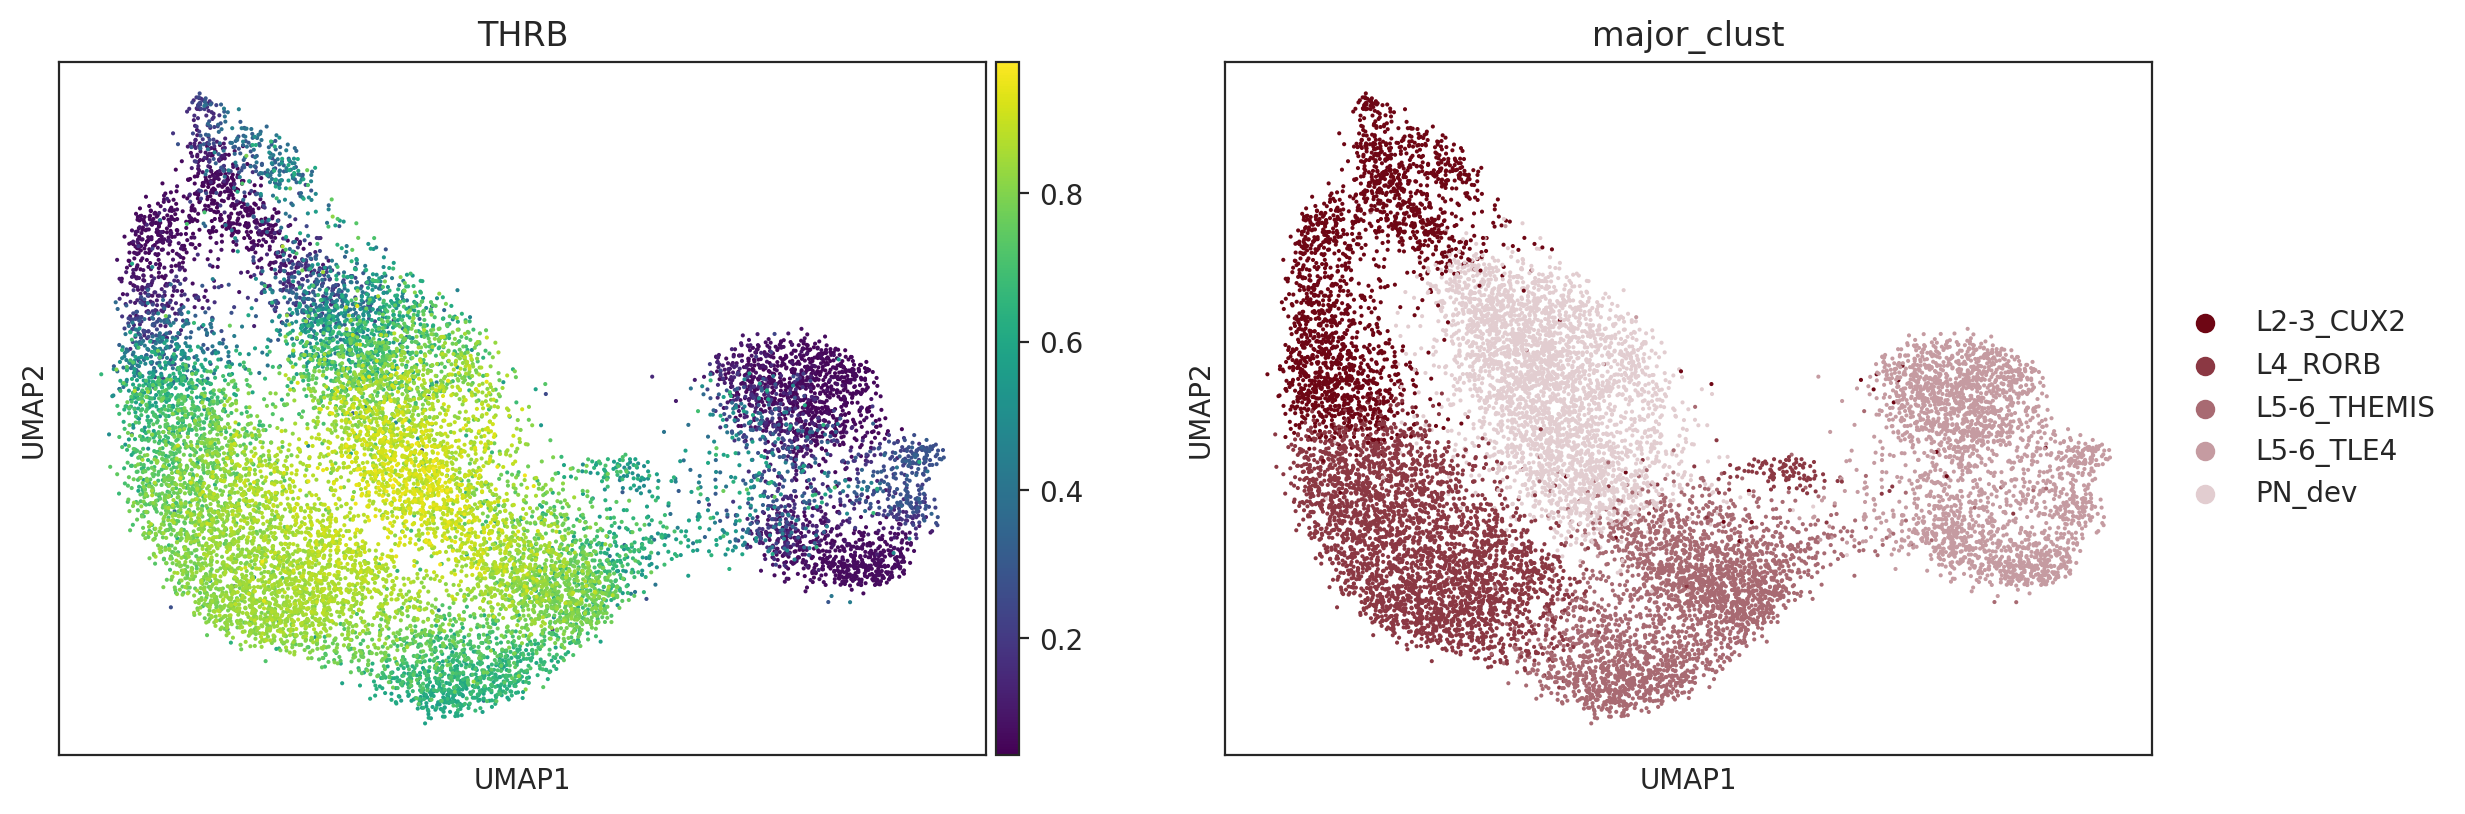

In [15]:
sc.pl.umap(oracle.adata, color=[goi, oracle.cluster_column_name],
                 layer="imputed_count", use_raw=False, cmap="viridis")

In [16]:
gc.collect()

6792

# Run simulation

In [17]:
goi = "THRB"

print(oracle.all_regulatory_genes_in_TFdict[:10])
print(len(oracle.all_regulatory_genes_in_TFdict))
print(goi in oracle.all_regulatory_genes_in_TFdict)

['AC023509.3', 'AC138696.1', 'ADSL', 'AHR', 'AIRE', 'AKAP8', 'ALX1', 'ALX3', 'ALX4', 'ANHX']
1023
True


In [13]:
# Enter perturbation conditions to simulate signal propagation after the perturbation.
oracle.simulate_shift(perturb_condition={goi: 0.0},
                      n_propagation=3)

NameError: name 'oracle' is not defined

In [19]:
gc.collect()

50

In [20]:
# Get transition probability
oracle.estimate_transition_prob(n_neighbors=200,
                                knn_random=True,
                                sampled_fraction=1)

In [21]:
gc.collect()

14303

In [22]:
# Calculate embedding
oracle.calculate_embedding_shift(sigma_corr=0.05)

In [23]:
# file_name = os.path.join(output_dir, f"Herring_simulation_{goi}.celloracle.oracle")
# oracle.to_hdf5(file_name)

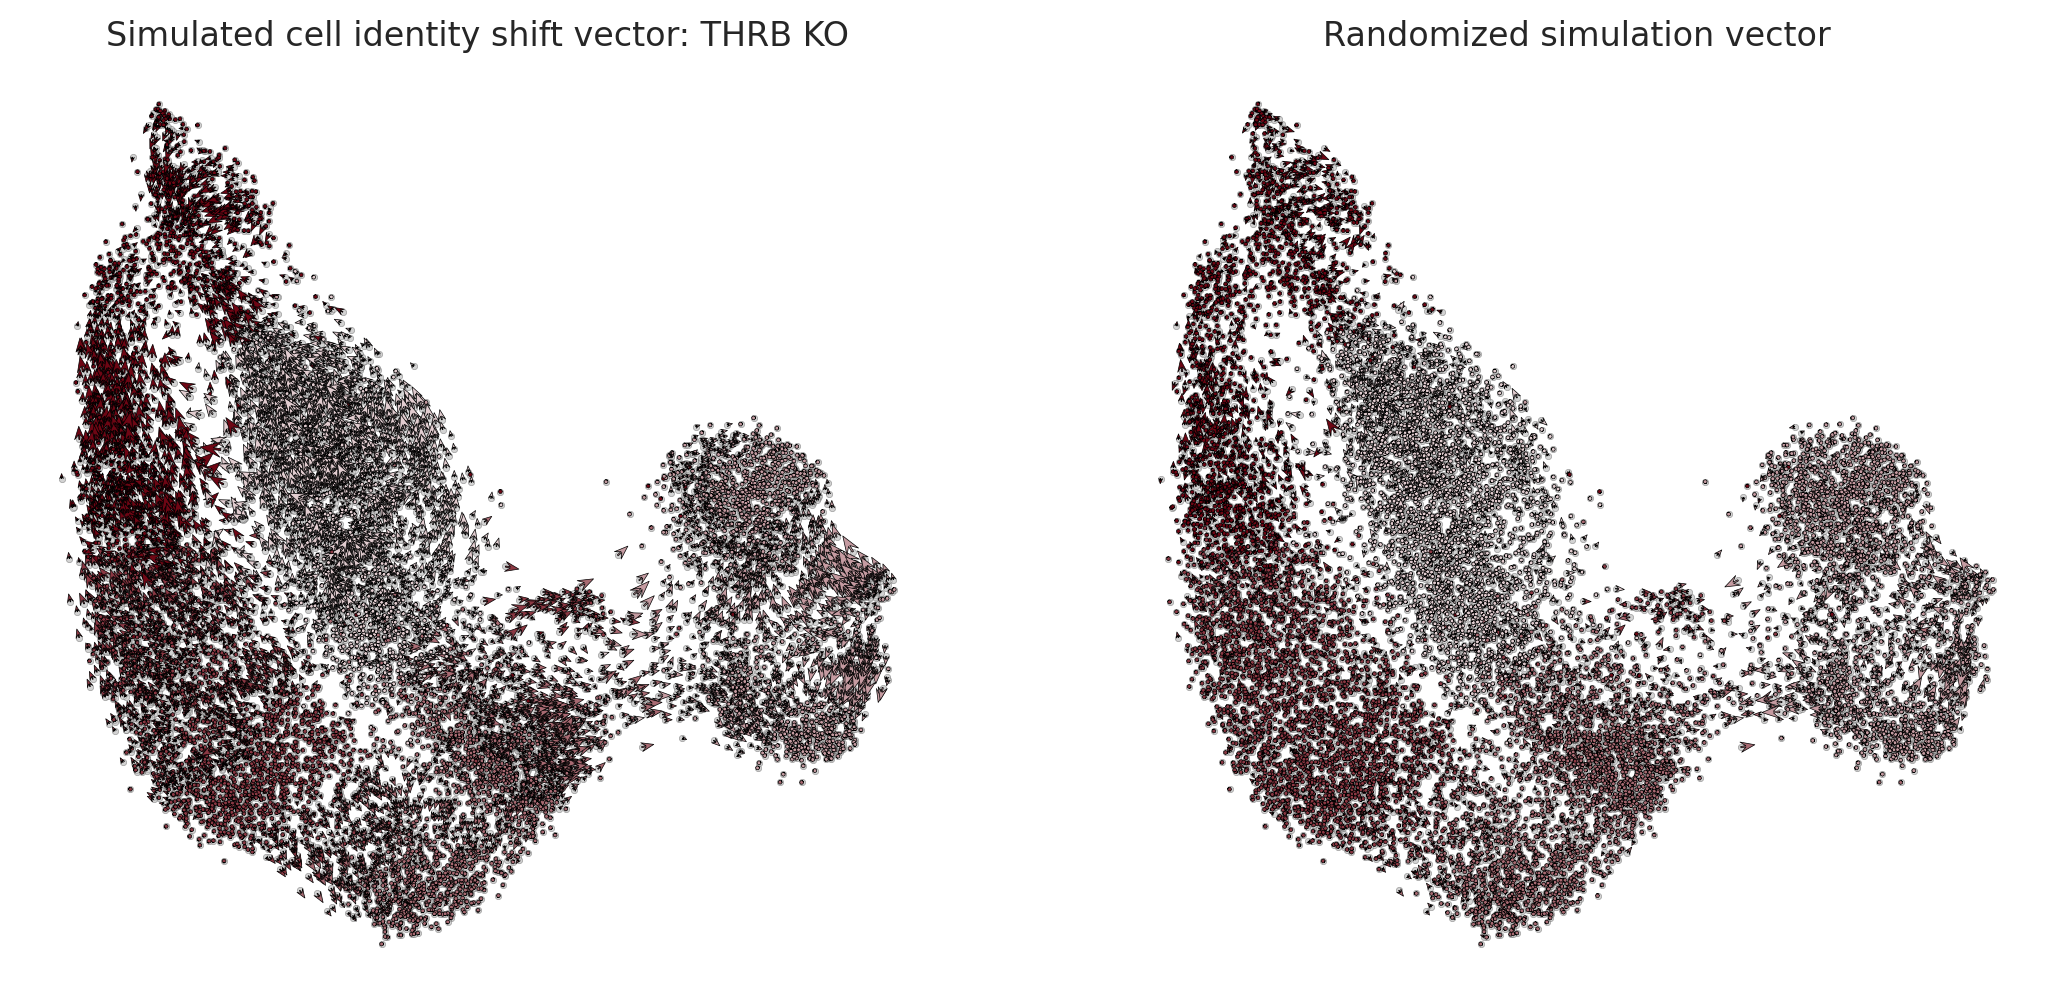

In [24]:
fig, ax = plt.subplots(1, 2,  figsize=[13, 6])

scale = 50
# Show quiver plot
oracle.plot_quiver(scale=scale, ax=ax[0])
ax[0].set_title(f"Simulated cell identity shift vector: {goi} KO")

# Show quiver plot that was calculated with randomized graph.
oracle.plot_quiver_random(scale=scale, ax=ax[1])
ax[1].set_title(f"Randomized simulation vector")

plt.show()

In [25]:
n_grid = 40
oracle.calculate_p_mass(smooth=0.8, n_grid=n_grid, n_neighbors=200)

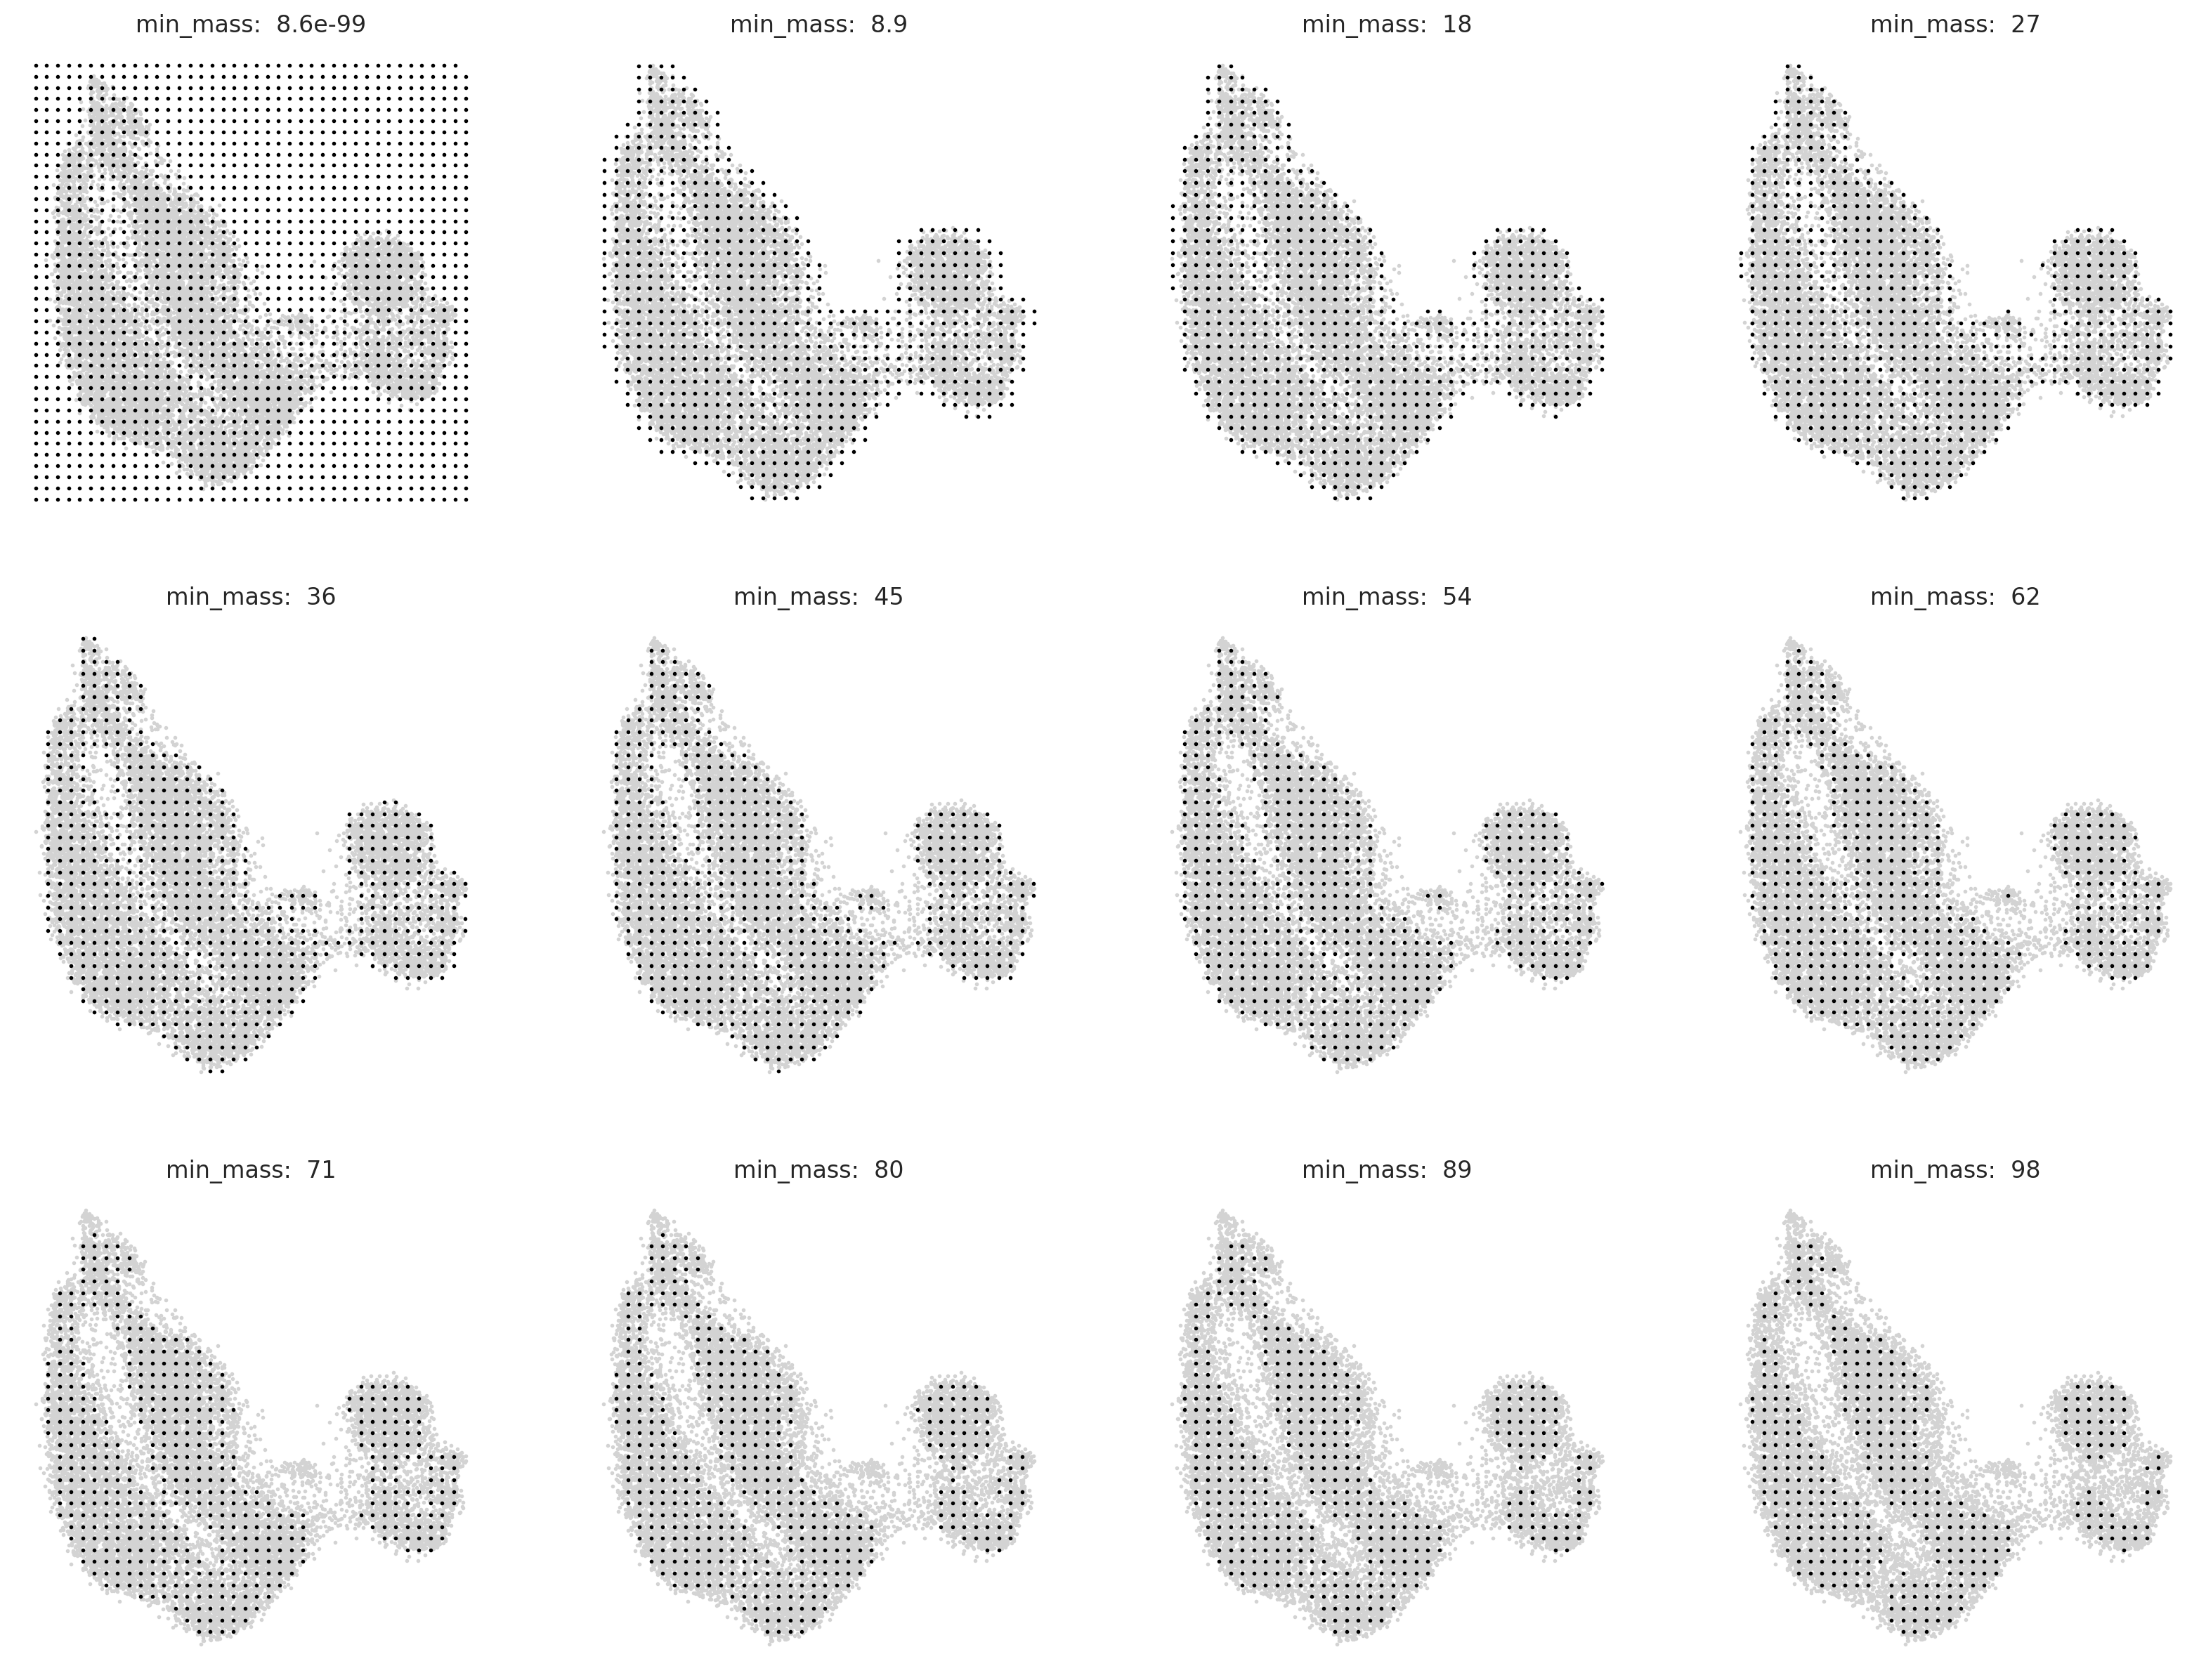

In [26]:
oracle.suggest_mass_thresholds(n_suggestion=12)

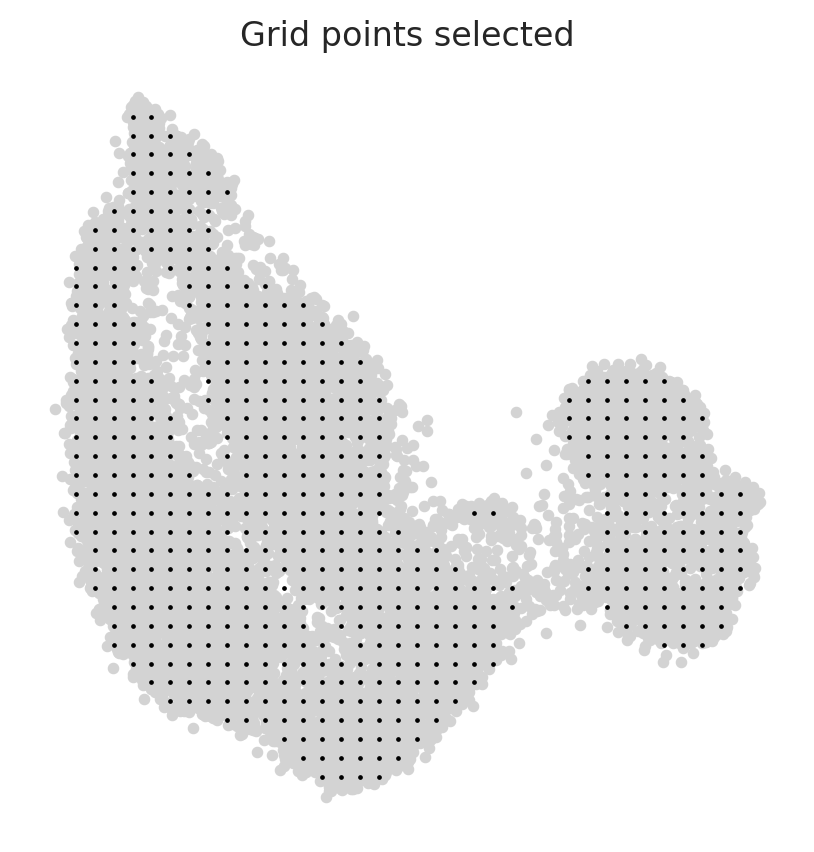

In [27]:
min_mass = 60
oracle.calculate_mass_filter(min_mass=min_mass, plot=True)

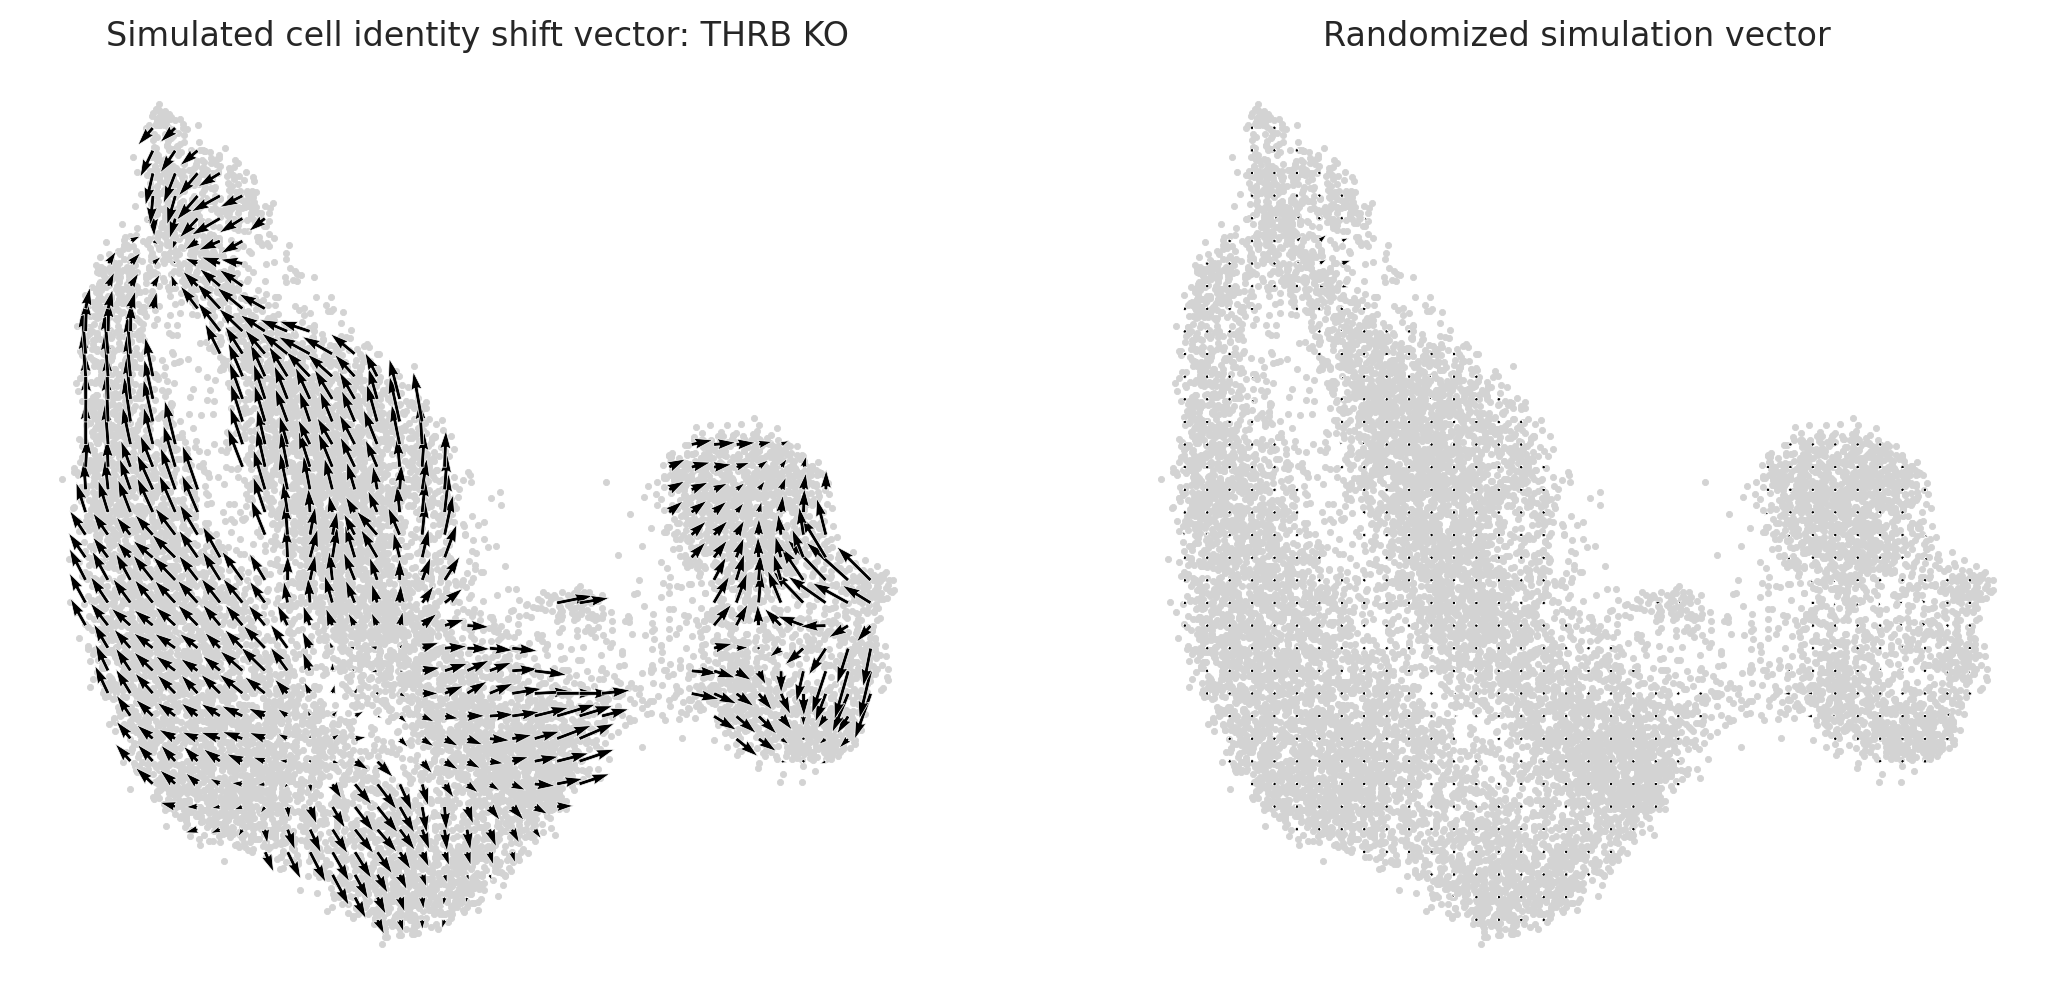

In [28]:
fig, ax = plt.subplots(1, 2,  figsize=[13, 6])

scale_simulation = 10
# Show quiver plot
oracle.plot_simulation_flow_on_grid(scale=scale_simulation, ax=ax[0])
ax[0].set_title(f"Simulated cell identity shift vector: {goi} KO")

# Show quiver plot that was calculated with randomized graph.
oracle.plot_simulation_flow_random_on_grid(scale=scale_simulation, ax=ax[1])
ax[1].set_title(f"Randomized simulation vector")

plt.show()

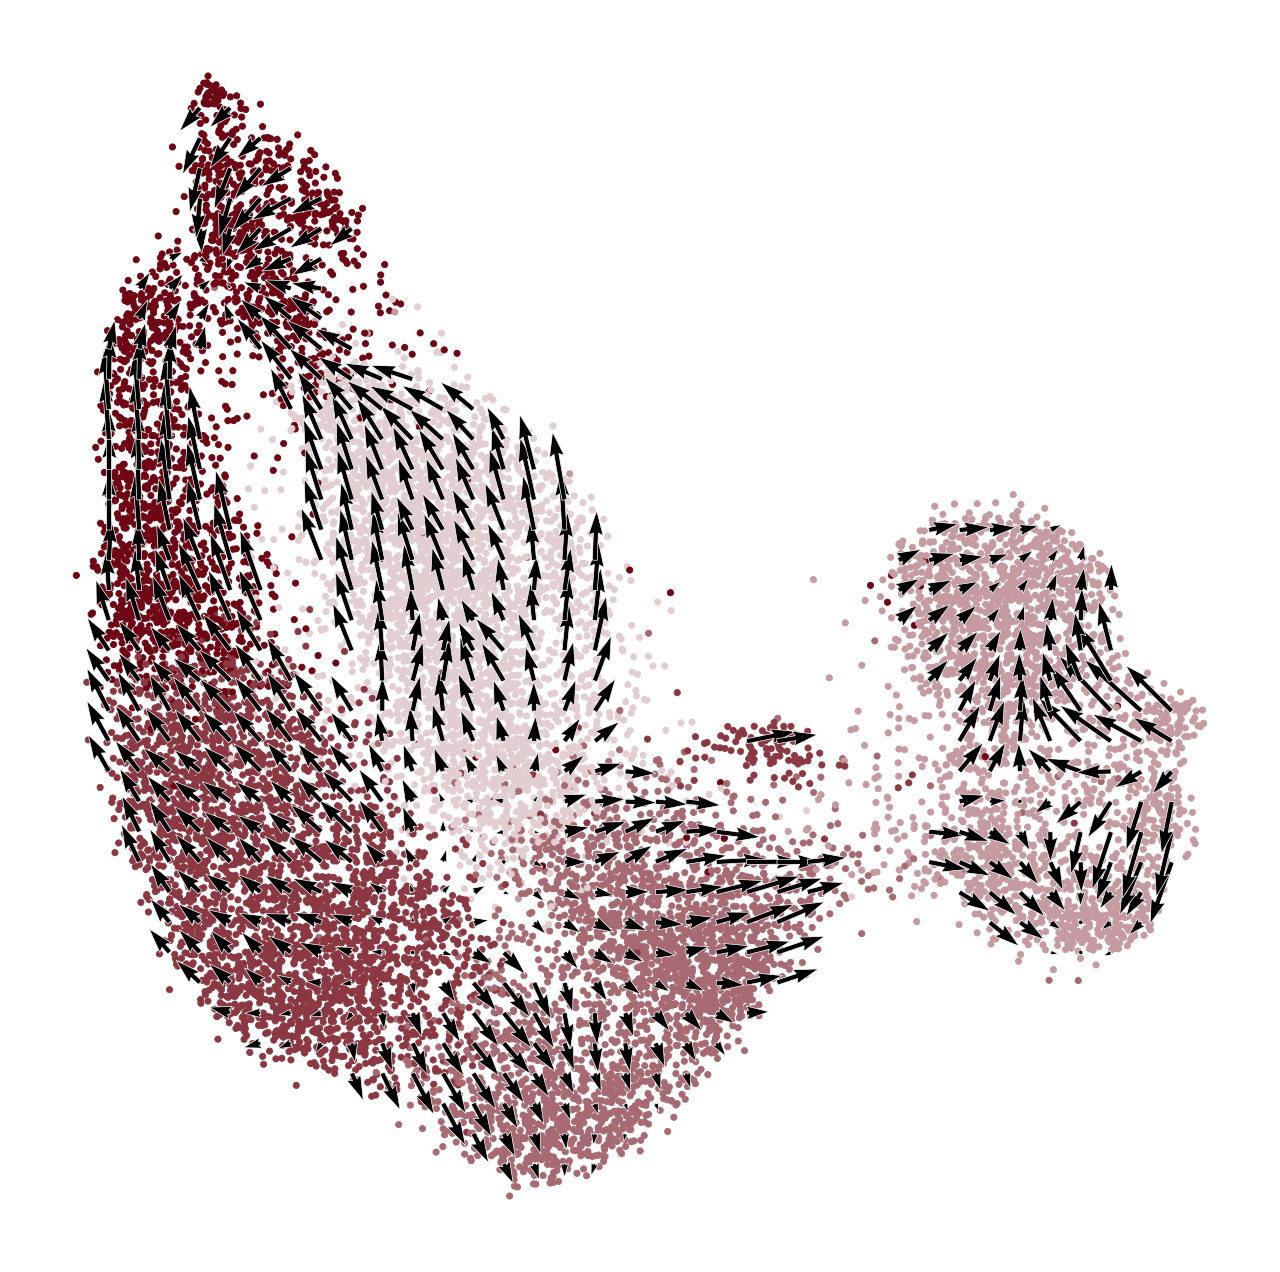

In [29]:
# Plot vector field with cell cluster
fig, ax = plt.subplots(figsize=[8, 8])

oracle.plot_cluster_whole(ax=ax, s=5)
oracle.plot_simulation_flow_on_grid(scale=scale_simulation, ax=ax, show_background=False)

In [30]:
def plot_arrows_legend(oracle, labels=None, colormap='viridis', scale=1, data_random=False, points_size=5, filename=None):
    fig, ax = plt.subplots(figsize=[8, 8])

    embedding = oracle.adata.obsm['X_umap']
    cluster_labels = oracle.adata.obs[labels]
    cluster_categories = pd.Categorical(cluster_labels)
    cmap = plt.cm.get_cmap(colormap, len(cluster_categories.categories))

    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=cluster_categories.codes, cmap=cmap, s=points_size)

    # Arrow selection
    if data_random:
        flow = oracle.flow_rndm
    else:
        flow = oracle.flow

    if hasattr(oracle, "mass_filter"):
        mass_filter = oracle.mass_filter
        gridpoints_coordinates = oracle.flow_grid
    else:
        mass_filter = np.zeros(flow.shape[0], dtype=bool)
        gridpoints_coordinates = embedding

    ax.quiver(gridpoints_coordinates[~mass_filter, 0],
              gridpoints_coordinates[~mass_filter, 1],
              flow[~mass_filter, 0],
              flow[~mass_filter, 1],
              scale=scale)

    ax.axis("off")

    if labels is not None:
        # Create legend elements based on the cluster categories
        legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=str(label),
                                      markerfacecolor=cmap(i), markersize=10)
                           for i, label in enumerate(cluster_categories.categories)]
        ax.legend(handles=legend_elements, loc='best')

    plt.tight_layout()
    
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    else:
        plt.show()

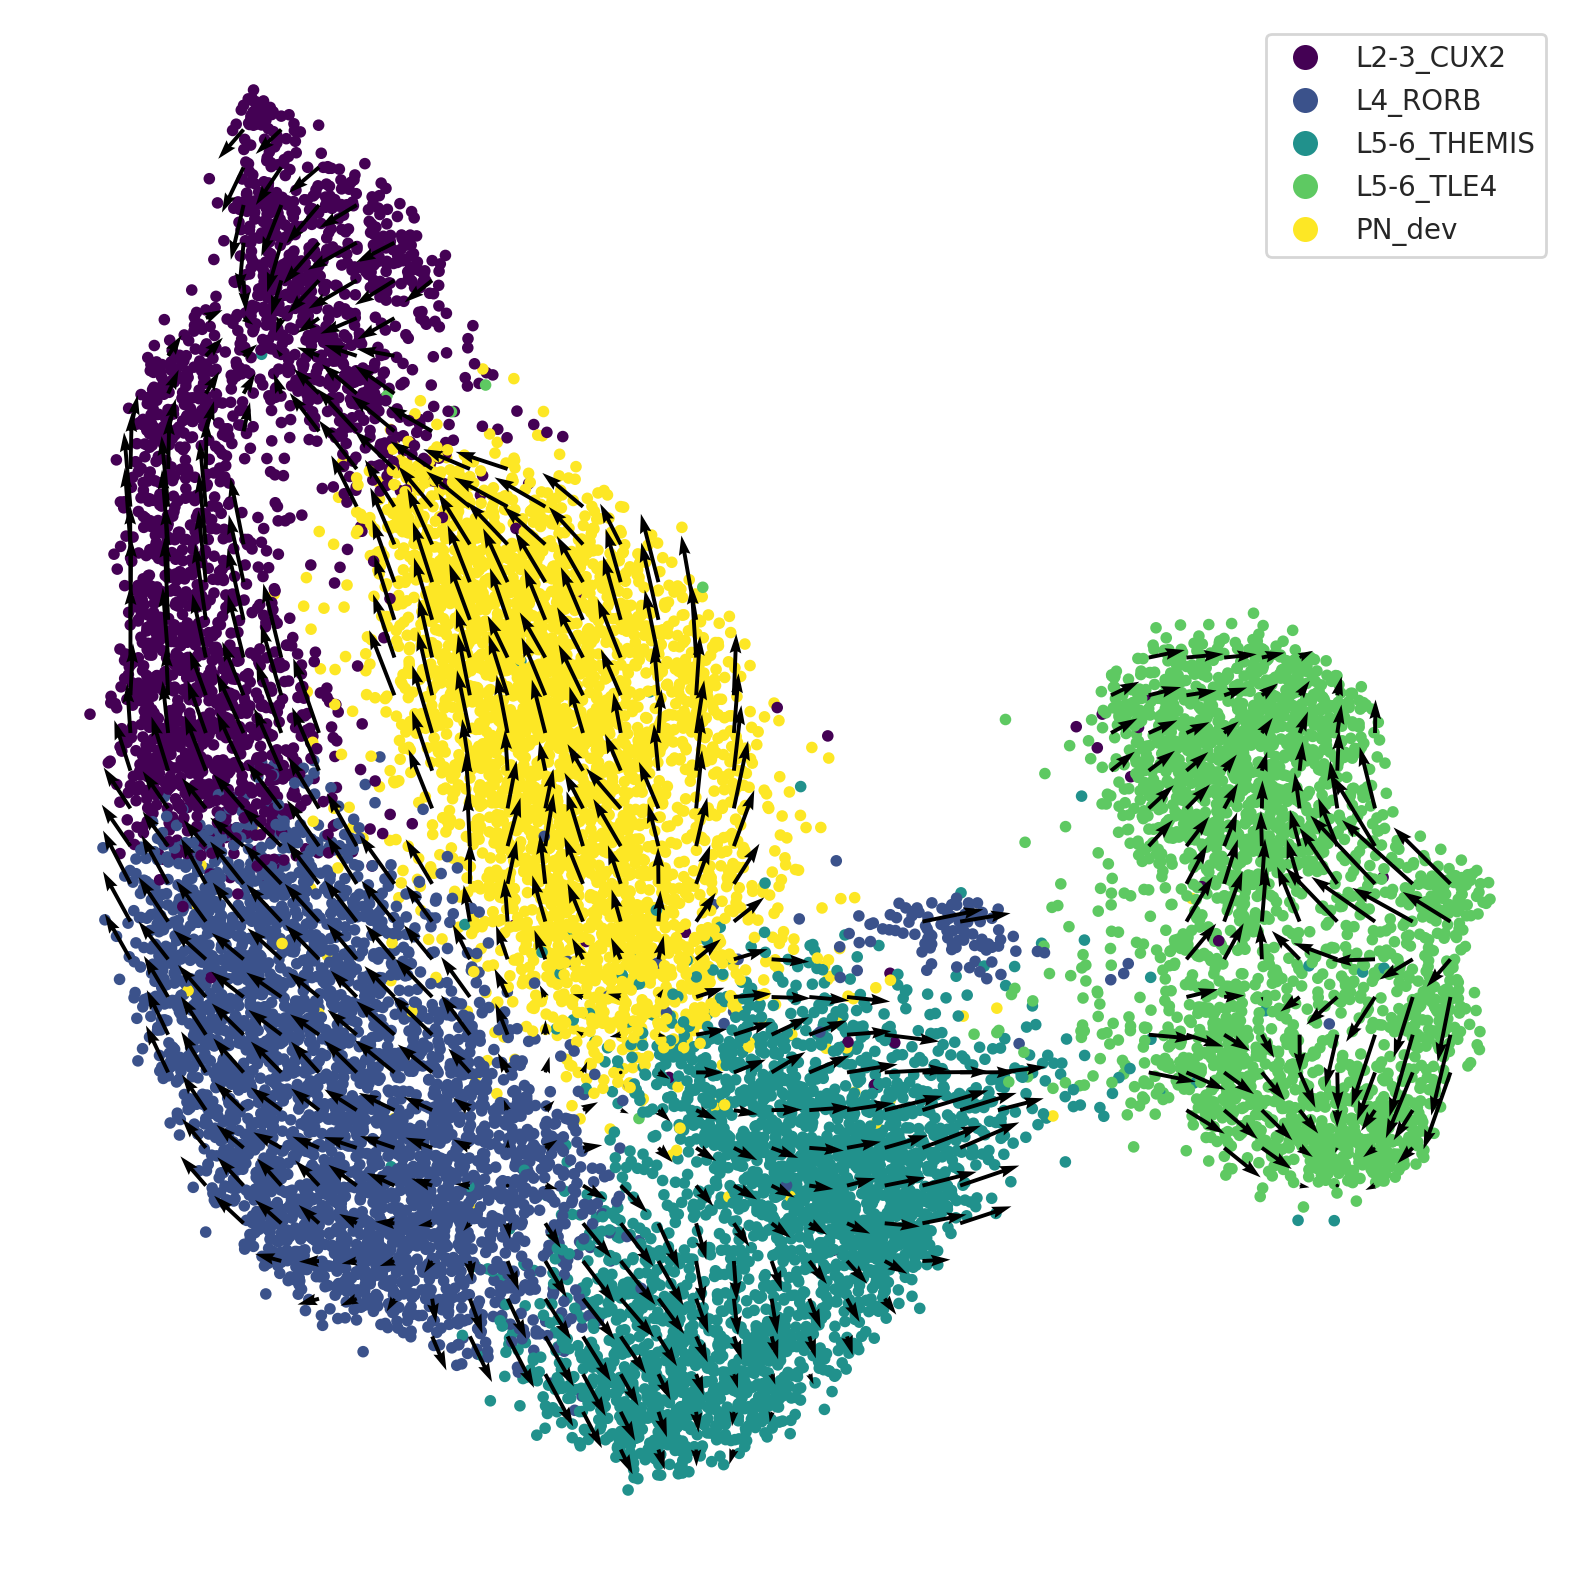

In [31]:
plot_arrows_legend(oracle, labels='major_clust', scale=10, data_random=False, points_size = 10, filename=os.path.join(output_dir, "plot_simulation_flow_on_grid.png"))

In [32]:
#file_name = os.path.join(output_dir, f"simulation_{goi}.celloracle.oracle")

In [33]:
#Save checkpoint
#oracle.to_hdf5(file_name)

# Evaluate perturbation results

In [34]:
# file_name = os.path.join(output_dir, f"Herring_simulation_{goi}.celloracle.oracle")
# oracle = co.load_hdf5(file_name)

In [35]:
simulated_count = oracle.adata.layers["simulated_count"]

In [36]:
original_count = oracle.adata.X.toarray()
log_fold_change = np.log2(simulated_count + 1) - np.log2(original_count + 1)

In [37]:
print(log_fold_change.shape)
log_fold_change

(13687, 3002)


array([[ 0.        ,  0.        ,  0.        , ...,  0.14608148,
         0.00381797, -1.09096336],
       [ 0.        ,  0.        ,  0.01422107, ...,  0.12042788,
         0.02307125,  0.        ],
       [ 0.00237927,  0.        ,  0.00252028, ...,  0.14394981,
         0.02487457, -0.88460022],
       ...,
       [ 0.00291534,  0.00210809,  0.        , ...,  0.06502008,
         0.02035904,  0.        ],
       [ 0.        ,  0.        ,  0.00230082, ..., -0.46161429,
         0.02474741,  0.        ],
       [ 0.        ,  0.        ,  0.00203598, ...,  0.07923405,
        -0.52517942, -1.11698675]])

In [38]:
top_n = 1000

In [39]:
cell_types = oracle.adata.obs['major_clust']
gene_names = oracle.adata.var_names

unique_cell_types = cell_types.unique()

table_data_list = []

for cell_type in unique_cell_types:
    # Get the indices of cells belonging to the current cell type
    cell_type_indices = np.where(cell_types == cell_type)[0]
    
    # Calculate the mean log fold change for each gene in the current cell type
    cell_type_log_fold_change = log_fold_change[cell_type_indices, :].mean(axis=0)
    
    # Calculate the absolute values of the mean log fold changes
    abs_cell_type_log_fold_change = np.abs(cell_type_log_fold_change)
    
    # Sort the absolute mean log fold changes in descending order
    sorted_indices = np.argsort(abs_cell_type_log_fold_change)[::-1]
    
    # Select the top_n genes based on the sorted indices
    top_gene_indices = sorted_indices[:top_n]
    top_genes = gene_names[top_gene_indices]
    
    top_log_fold_changes = cell_type_log_fold_change[top_gene_indices]
    
    cell_type_table_data = pd.DataFrame({
        'source': [cell_type] * top_n,
        'target': top_genes,
        'log_fold_change': top_log_fold_changes,
    })
    
    table_data_list.append(cell_type_table_data)

final_table_data_sim = pd.concat(table_data_list, ignore_index=True)

In [40]:
final_table_data_sim['fold_change'] = np.exp2(final_table_data_sim['log_fold_change'])

final_table_data_sim.head()

source     target  log_fold_change  fold_change
0  PN_dev       THRB        -0.731956     0.602087
1  PN_dev      FOXP1        -0.502330     0.705966
2  PN_dev       KAZN        -0.350239     0.784454
3  PN_dev      PRKG1         0.348698     1.273411
4  PN_dev  LINC01102         0.253760     1.192310

In [41]:
# final_table_data_sim.to_csv(os.path.join(output_dir, f'final_table_data_sim_{goi}.csv'), index=False)

In [42]:
# final_table_data_sim = pd.read_csv(os.path.join(output_dir, f'final_table_data_sim_{goi}.csv'))
# final_table_data_sim

source        target  log_fold_change  fold_change
0      PN_dev          THRB        -0.731956     0.602087
1      PN_dev         FOXP1        -0.502330     0.705966
2      PN_dev          KAZN        -0.350239     0.784454
3      PN_dev         PRKG1         0.348698     1.273411
4      PN_dev     LINC01102         0.253760     1.192310
...       ...           ...              ...          ...
4995  L4_RORB          DAB1         0.005797     1.004026
4996  L4_RORB   RP11-43D2.2         0.005788     1.004020
4997  L4_RORB  CTD-2536I1.1         0.005753     1.003996
4998  L4_RORB         HMCN1         0.005731     1.003980
4999  L4_RORB    AC069277.2         0.005728     1.003979

[5000 rows x 4 columns]

In [43]:
print(list(final_table_data_sim.target))

['THRB', 'FOXP1', 'KAZN', 'PRKG1', 'LINC01102', 'EPHA6', 'TMTC1', 'SYNDIG1', 'VCAN', 'DPP10', 'GLRA2', 'PRKG2', 'FAM13A', 'NRG1', 'PDE1A', 'PDE1C', 'SVEP1', 'MAK', 'DUSP4', 'RP11-122C21.1', 'FOXP2', 'VWC2', 'DCC', 'CTC-535M15.2', 'CDH8', 'BCYRN1', 'ZC4H2', 'ETV6', 'RP11-307P5.1', 'CTC-340A15.2', 'MYRIP', 'RIT2', 'PLS1', 'RORB', 'SAMD5', 'PDE8B', 'NCKAP5', 'BRINP3', 'PTCHD4', 'CDH13', 'DISP1', 'CHRM3', 'CLDN1', 'BHLHE22', 'RP11-116O11.1', 'EPHA4', 'TENM3', 'CBLN2', 'KCNK2', 'AGBL4', 'IL1RAPL2', 'SLC24A3', 'PTCH2', 'RPRM', 'CPNE8', 'RP11-75C9.2', 'SRM', 'EIF1B', 'ZNF385B', 'IMMP2L', 'KLHL4', 'BTG1', 'CCDC85A', 'HMGCS1', 'SEMA3C', 'HES6', 'NPY1R', 'RP11-611E13.2', 'MARCH3', 'FBXL7', 'ARHGAP15', 'CA10', 'ESRRG', 'LEPREL1', 'LRRTM4', 'KCTD16', 'PEX5L', 'ADAMTS19', 'HSP90AA1', 'CDH12', 'KCNIP4', 'CTC-575N7.1', 'POU6F2', 'GRM3', 'ASIC2', 'RASSF8', 'NDST3', 'ZNF804B', 'MTUS2', 'POU3F2', 'U91319.1', 'PTPN13', 'EPHB1', 'SASH1', 'GULP1', 'NRP1', 'UNC5C', 'ADAMTS9-AS2', 'RP11-452H21.1', 'ST6GALNAC

In [44]:
cell_types = oracle.adata.obs['major_clust']
unique_cell_types = cell_types.unique()

tops = []

for cell_type in unique_cell_types:
    tops_df = final_table_data_sim[final_table_data_sim['source'] == cell_type][:5]
    tops.append(tops_df)

tops_df = pd.concat(tops, ignore_index=True)
tops_df

source     target  log_fold_change  fold_change
0        PN_dev       THRB        -0.731956     0.602087
1        PN_dev      FOXP1        -0.502330     0.705966
2        PN_dev       KAZN        -0.350239     0.784454
3        PN_dev      PRKG1         0.348698     1.273411
4        PN_dev  LINC01102         0.253760     1.192310
5     L2-3_CUX2       THRB        -0.347917     0.785718
6     L2-3_CUX2      DPP10        -0.148365     0.902273
7     L2-3_CUX2      GLRA2         0.145720     1.106283
8     L2-3_CUX2      GLIS3        -0.131888     0.912637
9     L2-3_CUX2      FOXP1        -0.118671     0.921035
10  L5-6_THEMIS       THRB        -0.770485     0.586220
11  L5-6_THEMIS      PDE1C         0.423142     1.340845
12  L5-6_THEMIS     KCTD12         0.408818     1.327598
13  L5-6_THEMIS       AFF1         0.402119     1.321447
14  L5-6_THEMIS      ZFPM2         0.336256     1.262476
15    L5-6_TLE4       THRB        -0.172191     0.887494
16    L5-6_TLE4      PRKG1         0.125206     1.090663
17    L5-6_TLE4      ZFPM2         0.113503     1.081852
18    L5-6_TLE4     KCTD12         0.104948     1.075456
19    L5-6_TLE4       DPP4         0.097531     1.069941
20      L4_RORB       THRB        -0.834471     0.560789
21      L4_RORB      FOXP1        -0.402577     0.756506
22      L4_RORB      PRKG1         0.393543     1.313616
23      L4_RORB      EPHA6        -0.376784     0.770153
24      L4_RORB      DISP1        -0.359555     0.779405

# Get scores from `links`

In [7]:
links_file_name = os.path.join(output_dir, "PN_dev.celloracle.links")

In [8]:
links = co.load_hdf5(links_file_name)

In [11]:
links

In [12]:
links.filtered_links

{'L2-3_CUX2':         source   target  coef_mean  coef_abs             p      -logp
 5276      ETV1     EPS8  -0.484195  0.484195  2.486102e-09   8.604481
 10748    NFIL3   LRRTM4  -0.467498  0.467498  2.373778e-09   8.624560
 1676       ERG   BRINP3   0.454278  0.454278  4.968185e-13  12.303802
 17523  NEUROD6  SLC24A3   0.441128  0.441128  2.655162e-16  15.575909
 12784  NEUROD6   NKAIN3   0.419266  0.419266  3.384515e-13  12.470504
 ...        ...      ...        ...       ...           ...        ...
 9584    ZNF114    KIF14   0.002766  0.002766  1.208251e-08   7.917843
 4720      SOX1   DUSP10   0.002763  0.002763  1.128830e-05   4.947371
 17403     ALX3    SIAH3  -0.002763  0.002763  9.405327e-06   5.026626
 103      MEF2C    ACOT1   0.002762  0.002762  1.929252e-16  15.714611
 9492     NR1I3   KCTD12   0.002761  0.002761  1.596997e-08   7.796696
 
 [10000 rows x 6 columns],
 'L4_RORB':        source     target  coef_mean  coef_abs             p      -logp
 2512    NHLH2      CDH

In [6]:
goi = "THRB"

THRB


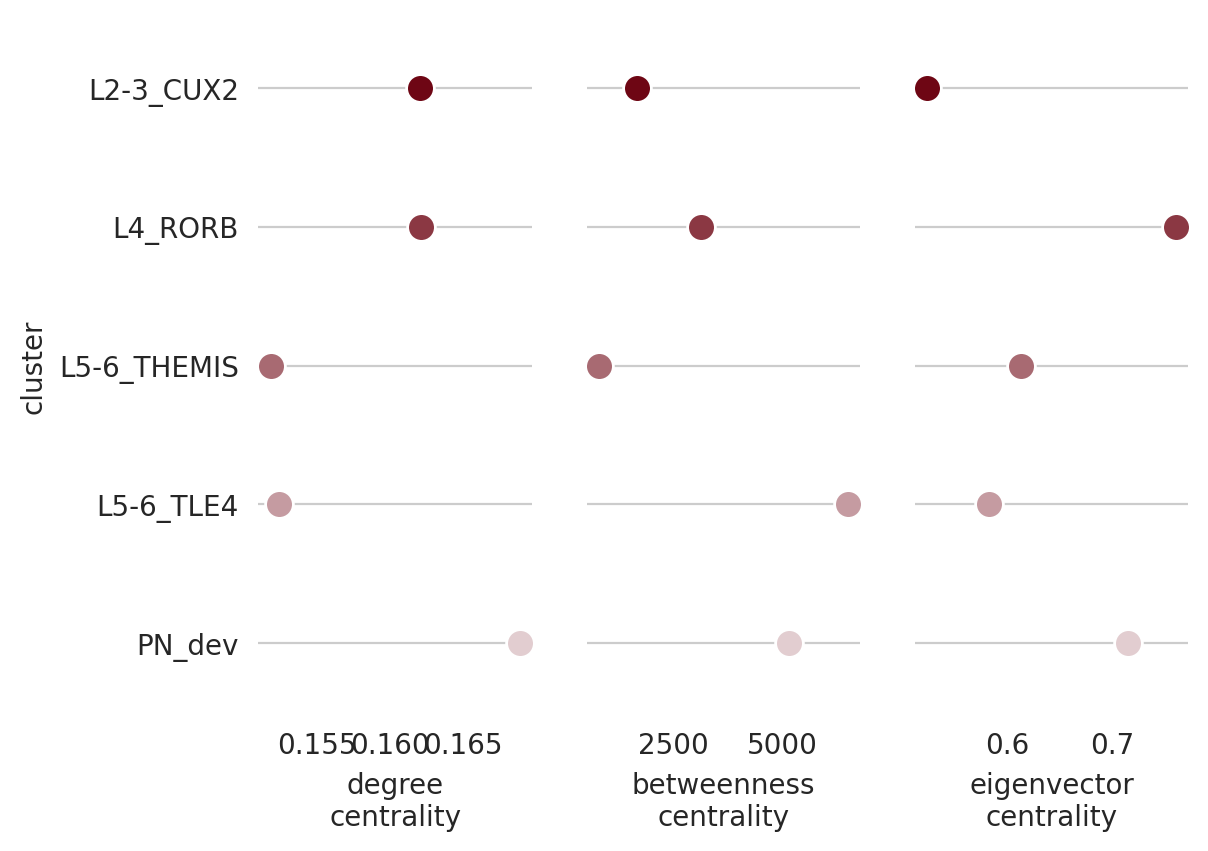

In [7]:
links.plot_score_per_cluster(goi=goi)

In [8]:
all_table_data = []

# Iterate over all cell types in the links.filtered_links dictionary
for celltype in links.filtered_links:
    # Get the GRN data for the current cell type
    grn_data = links.filtered_links[celltype]
    
    grn_data = grn_data[grn_data["source"] == goi]
    
    # Calculate the score for each row
    grn_data["score"] = -np.log10(grn_data["p"])
    
    grn_data["celltype"] = celltype
    
    grn_data = grn_data.rename(columns={"-logp": "X.logp"})
    
    table_data = grn_data[["source", "target", "coef_mean", "coef_abs", "p", "X.logp", "score", "celltype"]]
    
    all_table_data.append(table_data)

# Concatenate the table data from all cell types into a single DataFrame
final_table_data = pd.concat(all_table_data, ignore_index=True)

final_table_data.head()

source    target  coef_mean  coef_abs             p     X.logp      score  \
0     THRB     PDE1A  -0.173705  0.173705  4.761137e-12  11.322289  11.322289   
1     THRB     SLIT2   0.156004  0.156004  9.198086e-17  16.036303  16.036303   
2     THRB     FOXP1   0.146037  0.146037  2.762951e-13  12.558627  12.558627   
3     THRB      KAZN   0.121339  0.121339  9.550725e-12  11.019964  11.019964   
4     THRB    MAP3K5   0.110309  0.110309  2.890653e-10   9.539004   9.539004   
..     ...       ...        ...       ...           ...        ...        ...   
875   THRB     ABTB1   0.001017  0.001017  4.046311e-05   4.392941   4.392941   
876   THRB   C2orf48  -0.000948  0.000948  1.069801e-07   6.970697   6.970697   
877   THRB  SLC25A37   0.000936  0.000936  7.425147e-08   7.129295   7.129295   
878   THRB     MATN2  -0.000920  0.000920  3.943278e-05   4.404143   4.404143   
879   THRB   PACSIN3  -0.000882  0.000882  5.160833e-20  19.287280  19.287280   

      celltype  
0    L2-3_CUX2  
1    L2-3_CUX2  
2    L2-3_CUX2  
3    L2-3_CUX2  
4    L2-3_CUX2  
..         ...  
875     PN_dev  
876     PN_dev  
877     PN_dev  
878     PN_dev  
879     PN_dev  

[880 rows x 8 columns]

In [9]:
# final_table_data.to_csv(os.path.join(output_dir, f'final_table_data_GRN_{goi}.csv'), index=False)

In [10]:
# final_table_data = pd.read_csv(f'{folder}final_table_data_GRN.csv')

In [11]:
# links.filtered_links['L2-3_CUX2'].source